# Data Extraction and cleaning

From Kaggle, we downloaded a dataset containing 380'000 songs from various genres. We will use this dataset as our baseline:
https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics

In [1]:
import numpy as np
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import time

In [2]:
MAIN_GENRES = {'metal', 'pop', 'hip hop', 'country', 'jazz'} # Already have too much songs for rock

### Extraction

In [8]:
filepath = "../kaggleDataset/lyrics.csv" #lyrics
lyrics_df = pd.read_csv(filepath)
lyrics_df.set_index('index', inplace = True)

In [9]:
print("Number of songs: {}".format(len(lyrics_df)))
lyrics_df.head()

Number of songs: 362237


,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


We will only keep the songs with availaible lyrics ! (Maybe keep the songs with no lyrics as the song name often appears in the lyrics)

In [10]:
lyrics_df.dropna(axis = 'index', subset = ['lyrics'], inplace = True)
print("Number of songs WITH available lyrics: {}".format(len(lyrics_df)))

Number of songs WITH available lyrics: 266557


In [11]:
artists = set(lyrics_df["artist"])
genres = set(lyrics_df["genre"])

In [12]:
print("Genres: {}".format(genres))
print("Number of artists: {}".format(len(artists)))

Genres: {'Folk', 'Other', 'Indie', 'Jazz', 'Metal', 'Rock', 'Electronic', 'Hip-Hop', 'Pop', 'Country', 'Not Available', 'R&B'}
Number of artists: 14543


In [13]:
not_available_df = lyrics_df[lyrics_df['genre'] == 'Not Available']
not_available_df.head()

,song,year,artist,genre,lyrics
index,,,,,
350,oooh-ooh-saint-nick,2009,dick-mace,Not Available,Santa Claus was scootin'across the roof tops '...
385,wer-liebe-sucht,2006,daliah-lavi,Not Available,Ist das so schwer\nein kleines Lächeln\nwenn d...
386,es-geht-auch-so,2006,daliah-lavi,Not Available,Der Weg\nden du und ich gegangen\nführt mit ei...
387,liebeslied-jener-sommernacht,2006,daliah-lavi,Not Available,Rote Schatten warf das Feuer\nhell wie Gold wa...
388,willst-du-mit-mir-gehn,2006,daliah-lavi,Not Available,"Willst Du mit mir gehn,Wenn mein Weg in Dunkel..."


Use the detect library to detect the main language of each song and remove the songs that are detected as NOT english

In [14]:
def language_of_lyrics(lyrics):
    try:
        lang = detect(lyrics)
        return lang
    except:
        return "no lang"

#lyrics_df['language'] = lyrics_df.apply(lambda row: language_of_lyrics, axis = 1)
"""
list_langs = []
for i, row in lyrics_df.iterrows():
    if i % 1000 == 0:
        print(i)
    lang = language_of_lyrics(row['lyrics'])
    list_langs.append(lang)
"""

"\nlist_langs = []\nfor i, row in lyrics_df.iterrows():\n    if i % 1000 == 0:\n        print(i)\n    lang = language_of_lyrics(row['lyrics'])\n    list_langs.append(lang)\n"

In [14]:
lyrics_df['language'] = list_langs
english_df = lyrics_df[lyrics_df['language'] == 'en']
print(len(english_df))
english_df.head()

238239


,song,year,artist,genre,lyrics,language
index,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",en
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",en
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,en
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",en
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",en


In [16]:
english_df['genre'] = english_df['genre'].apply(lambda g: g.lower())
# Save the csv file to avoid running the lyrics language detection again
#english_df.to_csv("../kaggleDataset/lyrics_cleaned.csv", index = False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 'Not Available' genre: get rid of the songs or get genre of artist from Spotify ?

### Data Exploration

In [15]:
english_df = pd.read_csv("../kaggleDataset/lyrics_cleaned.csv")
artist_genre_df = pd.read_csv("../kaggleDataset/artists_main_genre.csv")
artist_genre_df.head()

,artist,main genre
0,Black Eyed Peas,pop
1,Joy Division,rock
2,Mint Condition,pop
3,Plump DJs,electronic
4,Jope Ruonansuu,pop


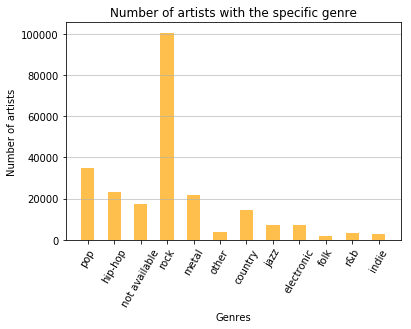

In [16]:
n, bins, patches = plt.hist(x = list(english_df["genre"]), bins=np.arange(0,len(set(english_df["genre"])) + 1), color='orange', align = 'left', alpha=0.7, rwidth=0.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Genres')
plt.ylabel('Number of artists')
plt.title('Number of artists with the specific genre')
plt.xticks(rotation=60)
plt.show()

We keep only the artists with the genre of interests and try to give the same format to artist's names between the 2 dataframes: main_lyrics_df and artist_genre_df in order to remove the artists for which we already have the lyrics from the ones for which we want to fetch the lyrics online. 

In [17]:
main_lyrics_df = english_df[english_df['genre'].isin(MAIN_GENRES)]
print("Ratio of lyrics kept from main genres: {}".format(len(main_lyrics_df) / len(english_df)))

# Give same format of artist names in both dataframes:
main_lyrics_df['artist'] = main_lyrics_df['artist'].apply(lambda a: a.replace('-', ' ').lower()) # beyonce-knowles -> beyonce knowles
artist_genre_df['artist'] = artist_genre_df['artist'].apply(lambda a: a.replace('-', ' ').lower())
# Create dictionary of artist - genre
artist_genre_dict = dict(zip(list(artist_genre_df['artist']), list(artist_genre_df['main genre'])))

# Get the set of artists for which we don't already have the lyrics
artists_to_fetch = set(artist_genre_df['artist']).difference(set(main_lyrics_df['artist']))
print("Artists to fetch number: {} , ratio: {}".format(len(artists_to_fetch), len(artists_to_fetch) / len(set(artist_genre_df['artist']))))

Ratio of lyrics kept from main genres: 0.32715886147943873
Artists to fetch number: 1657 , ratio: 0.9236343366778149


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Now let's have a small insight of some artists in the main_lyrics_df and how these lyrics look like

In [18]:
genres_artists_dict = {}
for genre in genres:
    lyrics_genre = main_lyrics_df[main_lyrics_df['genre'] == genre.lower()]
    genres_artists_dict[genre] = set(lyrics_genre['artist'])
    
print("Artists in Metal: {}".format(list(genres_artists_dict['Metal'])[:5]))

Artists in Metal: ['beyond fear', 'for the fallen dreams', 'dreaming', 'the day will come', 'divina enema']


Get example of lyrics:

In [19]:
artist = 'architects'
song = 'gravedigger'
example = main_lyrics_df[main_lyrics_df['artist'] == artist]
print(list(example[example['song'] == song]['lyrics']))

["An iron fist in a velvet glove.\r\nAnother vulture posing as a dove.\r\nDo you have no shame? Look at what you've become.\r\nYou are the reason we are bitter and then some.\r\nBitter and then some.\r\nThey sing of saviors, we sing of sorrow.\r\nBut we're still holding on for dear life.\r\nYou sold us all down the river.\r\nI hope you choke on the vows that you failed to deliver.\r\nYou said you'd change the world, but death still flies east.\r\nThe blind lead the blind, so we bomb for peace.\r\nGravedigger (gravedigger) there's blood on your hands.\r\nYou built this empire on salt and sand.\r\nNot all is fair in love and war.\r\nHistory repeats, we've seen this all before.\r\nWe've given the vampires the keys to the blood bank.\r\nThey say the more things change, the more they stay the same.\r\nWhile the liars leech, the crooked preach.\r\nSo lie through your teeth, lie like you mean it.\r\nIt beggars belief, do you really think that we still fucking believe it?\r\nYou fucking parasi

### Scrapping for more lyrics on https://www.lyricsfreak.com:

In [20]:
import requests
from bs4 import BeautifulSoup

In [21]:
url_lyricsfreak = 'https://www.lyricsfreak.com'

In [22]:
def get_lyrics_from_link(url):
    response = requests.get(url).content
    soup_lyrics = BeautifulSoup(response, "lxml")
    # Get lyrics from the link
    lyrics_html = soup_lyrics.find_all('div', class_= "dn") # found by inspecting the url
    try:
        lyrics = str(lyrics_html).split('content_h">')[1].split('</div>')[0]
    except IndexError:
        # Some lyrics have an url but acces is restricted
        print("Lyrics restricted for URL {}".format(url))
        return ''
    """Do all the cleaning on the lyrics here: maybe keep if only english ?"""
    # Replace line jump (<br/>) with puctuation .
    lyrics_cleaned = lyrics.replace('<br/>', '. ')
    return lyrics_cleaned


# Given an artist name, get all his songs and lyrics available on lyricsfreak
def get_songs_from_artist(artist_name, genre):
    # Convert artist name to right format for the url
    artist = artist_name.lower()
    first_char = artist[0]
    artist_url = artist.replace(' ', '+') # Name with spaces
    url = url_lyricsfreak + '/' + first_char + '/' + artist_url + '/'
    # Get HTML info on URL
    response = requests.get(url).content
    soup = BeautifulSoup(response, "lxml")
    # Get all songs from that artist on the website
    songs_html = soup.find_all("td", "colfirst") # parameters found by inspecting the url
    
    songs_name_link = []
    for song in songs_html:
        song = str(song)
        if artist_url + '/' in song:
            link = song.split(artist_url + '/')[1].split('"')[0]
            song_name = song.split('title="')[1].split(' Lyrics"')[0]
            # Fetch the lyrics for this song
            url_lyrics = url + link
            lyrics = get_lyrics_from_link(url_lyrics)
            if lyrics != '':
                # Get same format as the rows of the main_lyrics_df
                year = None
                language = None
                songs_name_link.append([song_name, year, artist_name, genre, lyrics, language])
    return songs_name_link

Let's run a test on a sample of artists to see if the functions work as expected

In [56]:
import time

start = time.time()
test_artists = ['Northlane', 'Mac Miller']
test_dict = {test_artists[0]: 'metal', test_artists[1]: 'hip hop'}

# Create empty dataframe to store results
df = pd.Dataframe(columns = list(main_lyrics_df.columns))
for artist in test_artists:
    genre = test_dict[artist]
    artist_lyrics = get_songs_from_artist(artist, genre)
    print("{} - Number of lyrics found: {}".format(artist, len(artist_lyrics)))
    lyrics_test.append(artist_lyrics)
end = time.time()
print(end - start)

Northlane - Number of lyrics found: 32
Mac Miller - Number of lyrics found: 200
37.192687034606934


In [23]:
songs_per_genre = {}
genres = [g.lower() for g in genres]
for genre in genres:
    songs_per_genre[genre] = len(english_df[english_df["genre"] == genre])
print(songs_per_genre)
print(MAIN_GENRES)

{'folk': 1790, 'other': 3989, 'indie': 2975, 'jazz': 7351, 'metal': 21532, 'rock': 100565, 'electronic': 7016, 'hip-hop': 23035, 'pop': 34807, 'country': 14252, 'not available': 17579, 'r&b': 3348}
{'country', 'metal', 'pop', 'jazz', 'hip hop'}


In [26]:
user = "oli"
artists_to_fetch = set(artist_genre_df['artist']).difference(set(main_lyrics_df['artist']))
print("Total length of artists to fetch: {}".format(len(artists_to_fetch)))

if user == "oli":
    genres_to_fetch = ["metal", "jazz", "country"]
elif user == "emma":
    genres_to_fetch = ["hip hop", "pop"]
    
artists_to_fetch = [a for a in artists_to_fetch if artist_genre_dict[a] in genres_to_fetch]
print("Length of artists to fetch for {}: {}".format(user, len(artists_to_fetch)))

Total length of artists to fetch: 1657
Length of artists to fetch for oli: 457


Let's fetch all the songs for all the artists for which we don't have their lyrics in the english_df dataframe. In order to get approximately the same number of songs for each genre, we will set a threshold (e.g. 50'000 songs). Once we have fetched online this threshold from a particular genre we make sure not to fetch any more songs from following artists of this genre

In [27]:
songs_per_genre_copy = songs_per_genre.copy()
THRESHOLD = 50000
# Create empty dataframe to store results
new_lyrics_df = pd.DataFrame(columns = list(main_lyrics_df.columns))

for i, artist in enumerate(artists_to_fetch):
    if i % 20 == 19:
        print("Percentage Completion: {}% , Lyrics Obtained: {}".format(100*i / len(list(artists_to_fetch)), len(new_lyrics_df)))
        secs_sleep = 60
        print("Now sleeping {} seconds".format(secs_sleep))
        time.sleep(secs_sleep)
    genre = artist_genre_dict[artist]
    nbr_songs_of_genre = songs_per_genre_copy[genre]
    if nbr_songs_of_genre < THRESHOLD:
        artist_lyrics = get_songs_from_artist(artist, genre)
        if len(artist_lyrics) == 0:
            print("Artist {} not found on lyricsfreak".format(artist))
        else:
            list_to_df = pd.DataFrame(artist_lyrics, columns = list(main_lyrics_df.columns))
            new_lyrics_df = new_lyrics_df.append(list_to_df)
            songs_per_genre_copy[genre] += len(artist_lyrics)

Artist karen peck & new river not found on lyricsfreak
Artist grachan moncur iii not found on lyricsfreak


KeyboardInterrupt: 

In [ ]:
# Save the new lyrics in csv file
new_lyrics_df.to_csv("../kaggleDataset/lyrics_augmented_" + user +".csv", index = False)

Combine the lyrics dataframe: lyrics_cleaned.csv with lyrics_augmented_oli.csv and lyrics_augmented_emma.csv